# Violin Plots for bootstrapped PAMIP and JRA55 data

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd
import os

# Northern Hemisphere

In [85]:
# Define the path to the data folder
data_folder = '/home/links/ct715/eddy_feedback/chapter1/saffin/bootstrap/data'

# Initialize a dictionary to store the EFP values for each model
bootstrap_results = {}

# Loop through each file in the data folder
for file_name in os.listdir(data_folder):
    if file_name.endswith('_djf_efp_values.npy'):
        model_name = file_name.split('_djf_efp_values.npy')[0]
        file_path = os.path.join(data_folder, file_name)
        efp_values = np.load(file_path)
        bootstrap_results[model_name] = efp_values
        
del bootstrap_results['ECHAM6.3']

# Convert bootstrap results to a DataFrame for plotting
bootstrap_df = pd.DataFrame({
    'Model': np.repeat(list(bootstrap_results.keys()), [len(v) for v in bootstrap_results.values()]),
    'EFP': np.concatenate(list(bootstrap_results.values()))
})

# Reorder the Model column so that models are in alphabetical order and JRA55 is at the end
model_order = sorted([model for model in bootstrap_results.keys() if model != 'JRA55']) + ['JRA55']
bootstrap_df['Model'] = pd.Categorical(bootstrap_df['Model'], categories=model_order, ordered=True)

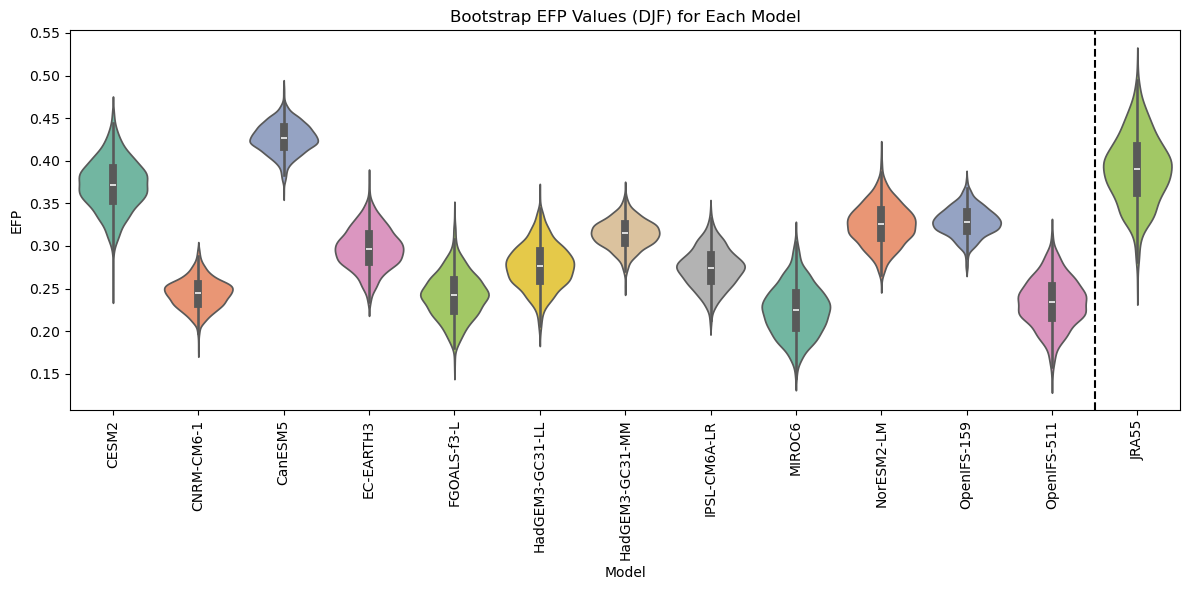

In [86]:
# Plot the bootstrap results as violin plots using Seaborn
plt.figure(figsize=(12, 6))
sns.violinplot(x='Model', y='EFP', data=bootstrap_df,
               hue='Model', palette='Set2')
plt.xticks(rotation=90)
plt.title('Bootstrap EFP Values (DJF) for Each Model')
plt.xlabel('Model')
plt.ylabel('EFP')


# Draw a vertical line between the models and JRA55
jra55_index = model_order.index('JRA55')
plt.axvline(x=jra55_index - 0.5, color='black', linestyle='--')
plt.tight_layout()

# Save the plot
plot_path = '/home/links/ct715/eddy_feedback/chapter1/saffin/bootstrap/plots/pamip_JRA55_efp_bootstrap_violin.pdf'
plt.savefig(plot_path)
plt.show()

# Southern Hemisphere

In [87]:
# Define the path to the data folder
data_folder = '/home/links/ct715/eddy_feedback/chapter1/saffin/bootstrap/data'

# Initialize a dictionary to store the EFP values for each model
bootstrap_results_jas = {}

# Loop through each file in the data folder
for file_name in os.listdir(data_folder):
    if file_name.endswith('_jas_efp_values.npy'):
        model_name = file_name.split('_jas_efp_values.npy')[0]
        file_path = os.path.join(data_folder, file_name)
        efp_values = np.load(file_path)
        if model_name == 'JRA55':
            bootstrap_results_jas[model_name] = efp_values
        else:
            bootstrap_results_jas[model_name] = efp_values.transpose()[0]
        
del bootstrap_results_jas['ECHAM6.3']

# Convert bootstrap results to a DataFrame for plotting
bootstrap_df_jas = pd.DataFrame({
    'Model': np.repeat(list(bootstrap_results_jas.keys()), [len(v) for v in bootstrap_results_jas.values()]),
    'EFP': np.concatenate(list(bootstrap_results_jas.values()))
})

# Reorder the Model column so that models are in alphabetical order and JRA55 is at the end
model_order = sorted([model for model in bootstrap_results_jas.keys() if model != 'JRA55']) + ['JRA55']
bootstrap_df_jas['Model'] = pd.Categorical(bootstrap_df_jas['Model'], categories=model_order, ordered=True)

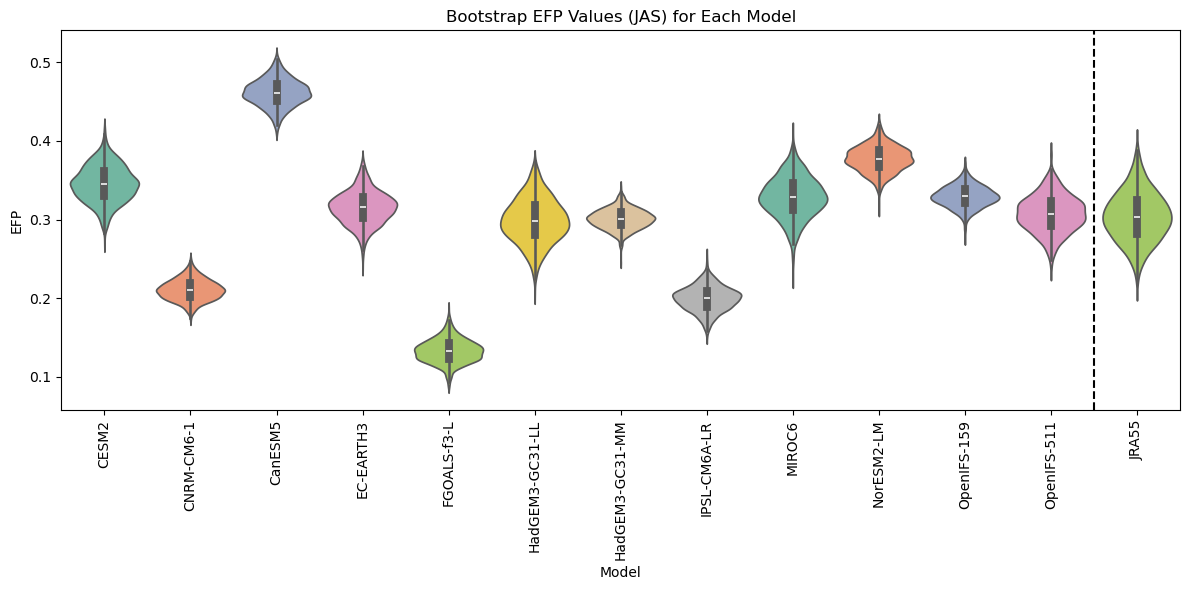

In [88]:
# Plot the bootstrap results as violin plots using Seaborn
plt.figure(figsize=(12, 6))
sns.violinplot(x='Model', y='EFP', data=bootstrap_df_jas,
               hue='Model', palette='Set2')
plt.xticks(rotation=90)
plt.title('Bootstrap EFP Values (JAS) for Each Model')
plt.xlabel('Model')
plt.ylabel('EFP')


# Draw a vertical line between the models and JRA55
jra55_index = model_order.index('JRA55')
plt.axvline(x=jra55_index - 0.5, color='black', linestyle='--')
plt.tight_layout()

# Save the plot
plot_path = '/home/links/ct715/eddy_feedback/chapter1/saffin/bootstrap/plots/pamip_JRA55_efp_jas_bootstrap_violin.pdf'
plt.savefig(plot_path)
plt.show()


# Combined Hemispheres

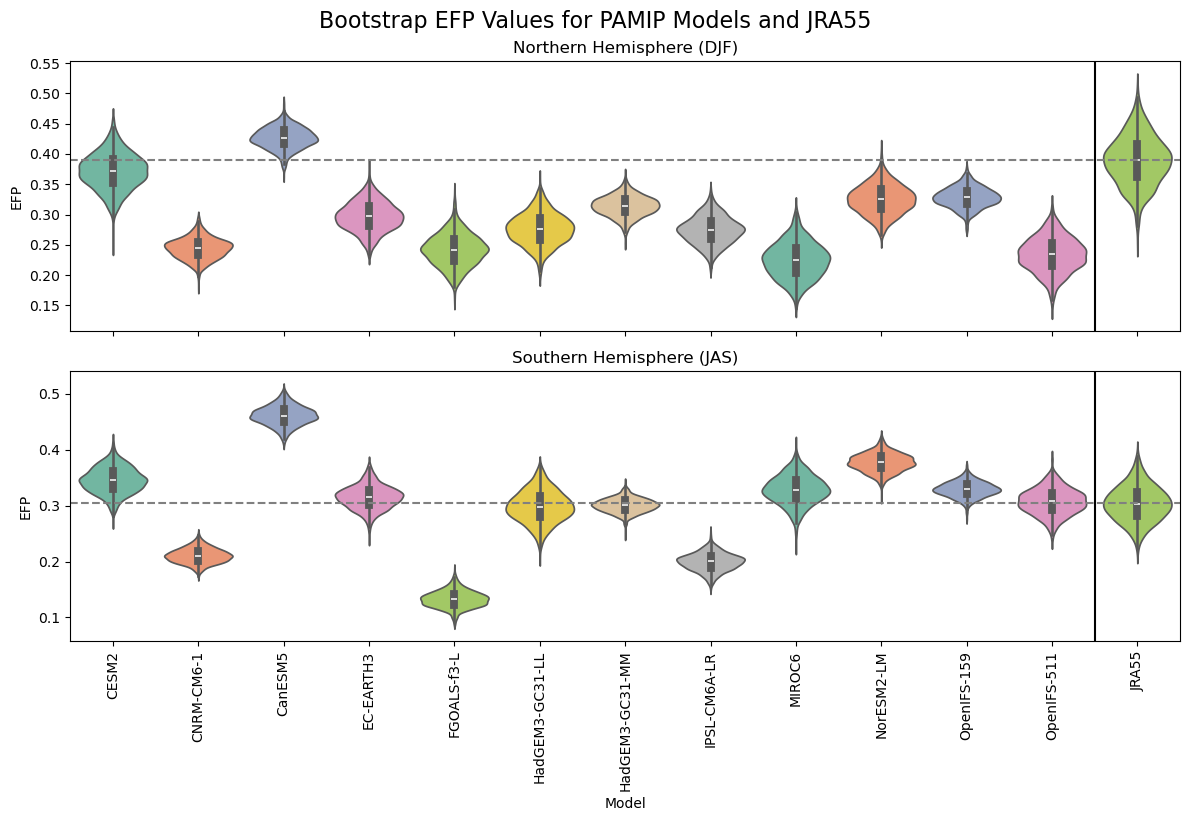

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (rows)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Plot the bootstrap results for DJF
sns.violinplot(ax=axes[0], x='Model', y='EFP', data=bootstrap_df, 
               hue='Model', palette='Set2')
axes[0].set_title('Northern Hemisphere (DJF)')
axes[0].set_xlabel('')  # Remove xlabel for upper plot
axes[0].set_ylabel('EFP')
axes[0].tick_params(axis='x', rotation=90)

# Draw a vertical line between the models and JRA55
jra55_index = model_order.index('JRA55')
axes[0].axvline(x=jra55_index-0.5, color='black', linestyle='-')

# Draw a horizontal dashed line at the mean value of JRA55 for DJF
jra55_mean_djf = bootstrap_df[bootstrap_df['Model'] == 'JRA55']['EFP'].mean()
axes[0].axhline(y=jra55_mean_djf, color='gray', linestyle='--')

# Plot the bootstrap results for JAS
sns.violinplot(ax=axes[1], x='Model', y='EFP', data=bootstrap_df_jas, 
               hue='Model', palette='Set2')
axes[1].set_title('Southern Hemisphere (JAS)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('EFP')
axes[1].tick_params(axis='x', rotation=90)

# Draw a vertical line between the models and JRA55
axes[1].axvline(x=jra55_index-0.5, color='black', linestyle='-')

# Draw a horizontal dashed line at the mean value of JRA55 for JAS
jra55_mean_jas = bootstrap_df_jas[bootstrap_df_jas['Model'] == 'JRA55']['EFP'].mean()
axes[1].axhline(y=jra55_mean_jas, color='gray', linestyle='--')

plt.tight_layout()

fig.suptitle('Bootstrap EFP Values for PAMIP Models and JRA55', y=1.02, fontsize=16)

# Save the plot
plot_path = '/home/links/ct715/eddy_feedback/chapter1/saffin/bootstrap/plots/pamip_JRA55_efp_bootstrap_violin_combined.pdf'
plt.savefig(plot_path)
plt.show()


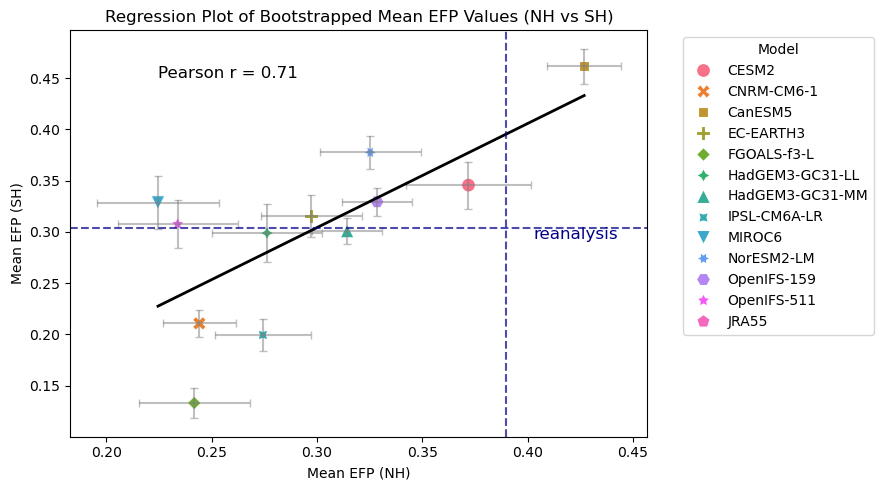

In [91]:
# Calculate the mean and standard deviation of EFP values for each model for NH and SH
mean_efp_nh = bootstrap_df.groupby('Model', observed=True)['EFP'].mean()
std_efp_nh = bootstrap_df.groupby('Model', observed=True)['EFP'].std()
mean_efp_sh = bootstrap_df_jas.groupby('Model', observed=True)['EFP'].mean()
std_efp_sh = bootstrap_df_jas.groupby('Model', observed=True)['EFP'].std()


# Create a DataFrame with the mean and standard deviation values for NH and SH
mean_efp_df = pd.DataFrame({
    'Model': mean_efp_nh.index,
    'EFP_NH': mean_efp_nh.values,
    'EFP_SH': mean_efp_sh.values,
    'EFP_NH_STD': std_efp_nh.values,
    'EFP_SH_STD': std_efp_sh.values
})

# Compute overall mean values
jra55_values = mean_efp_df[mean_efp_df["Model"] == "JRA55"][["EFP_NH", "EFP_SH"]]
jra55_nh = jra55_values['EFP_NH'].values[0]
jra55_sh = jra55_values['EFP_SH'].values[0]

mean_efp_df = mean_efp_df.drop(12).reset_index(drop=True)

# Compute Pearson's correlation
pearson_corr, _ = pearsonr(mean_efp_df['EFP_NH'], mean_efp_df['EFP_SH'])

# Create the plot
plt.figure(figsize=(9, 5))
sns.scatterplot(x='EFP_NH', y='EFP_SH', hue='Model', style='Model', data=mean_efp_df, s=100)

# Add error bars
plt.errorbar(mean_efp_df['EFP_NH'], mean_efp_df['EFP_SH'], 
             xerr=mean_efp_df['EFP_NH_STD'], yerr=mean_efp_df['EFP_SH_STD'], 
             fmt='none', ecolor='gray', alpha=0.5, capsize=3)

# Add regression line
sns.regplot(x='EFP_NH', y='EFP_SH', data=mean_efp_df, scatter=False, color='black', 
            line_kws={'linewidth': 2}, ci=None)

# Add mean reference lines
plt.axvline(jra55_nh, color='darkblue', linestyle='dashed', alpha=0.7)
plt.axhline(jra55_sh, color='darkblue', linestyle='dashed', alpha=0.7)

# Customize plot
plt.title('Regression Plot of Bootstrapped Mean EFP Values (NH vs SH)')
plt.xlabel('Mean EFP (NH)')
plt.ylabel('Mean EFP (SH)')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display Pearson's correlation
plt.text(mean_efp_df['EFP_NH'].min(), mean_efp_df['EFP_SH'].max(), f'Pearson r = {pearson_corr:.2f}', 
         fontsize=12, verticalalignment='top', horizontalalignment='left')

# Add 'Reanalysis' text
plt.text(mean_efp_df['EFP_NH'].max() - 0.12 * (mean_efp_df['EFP_NH'].max() - mean_efp_df['EFP_NH'].min()), 
         (mean_efp_df['EFP_SH'].max() + mean_efp_df['EFP_SH'].min()) / 2, 
         'reanalysis', fontsize=12, color='darkblue', verticalalignment='center')

plt.tight_layout()

# Save the plot
regression_plot_path = '/home/links/ct715/eddy_feedback/chapter1/saffin/bootstrap/plots/pamip_JRA55_efp_regression_plot.pdf'
plt.savefig(regression_plot_path, bbox_inches='tight')
plt.show()


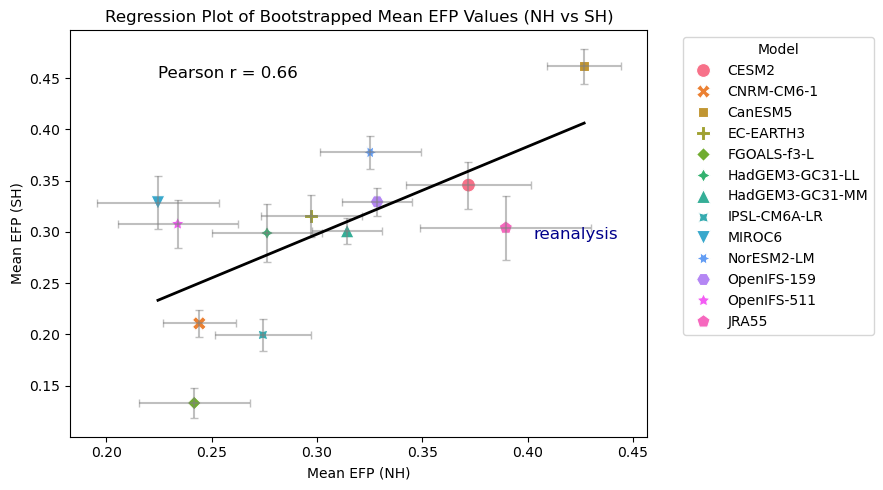

In [93]:
# Calculate the mean and standard deviation of EFP values for each model for NH and SH
mean_efp_nh = bootstrap_df.groupby('Model', observed=True)['EFP'].mean()
std_efp_nh = bootstrap_df.groupby('Model', observed=True)['EFP'].std()
mean_efp_sh = bootstrap_df_jas.groupby('Model', observed=True)['EFP'].mean()
std_efp_sh = bootstrap_df_jas.groupby('Model', observed=True)['EFP'].std()


# Create a DataFrame with the mean and standard deviation values for NH and SH
mean_efp_df = pd.DataFrame({
    'Model': mean_efp_nh.index,
    'EFP_NH': mean_efp_nh.values,
    'EFP_SH': mean_efp_sh.values,
    'EFP_NH_STD': std_efp_nh.values,
    'EFP_SH_STD': std_efp_sh.values
})

# Compute overall mean values
jra55_values = mean_efp_df[mean_efp_df["Model"] == "JRA55"][["EFP_NH", "EFP_SH"]]
jra55_nh = jra55_values['EFP_NH'].values[0]
jra55_sh = jra55_values['EFP_SH'].values[0]

# mean_efp_df = mean_efp_df.drop(12).reset_index(drop=True)

# Compute Pearson's correlation
pearson_corr, _ = pearsonr(mean_efp_df['EFP_NH'], mean_efp_df['EFP_SH'])

# Create the plot
plt.figure(figsize=(9, 5))
sns.scatterplot(x='EFP_NH', y='EFP_SH', hue='Model', style='Model', data=mean_efp_df, s=100)

# Add error bars
plt.errorbar(mean_efp_df['EFP_NH'], mean_efp_df['EFP_SH'], 
             xerr=mean_efp_df['EFP_NH_STD'], yerr=mean_efp_df['EFP_SH_STD'], 
             fmt='none', ecolor='gray', alpha=0.5, capsize=3)

# Add regression line
sns.regplot(x='EFP_NH', y='EFP_SH', data=mean_efp_df, scatter=False, color='black', 
            line_kws={'linewidth': 2}, ci=None)

# Add mean reference lines
# plt.axvline(jra55_nh, color='darkblue', linestyle='dashed', alpha=0.7)
# plt.axhline(jra55_sh, color='darkblue', linestyle='dashed', alpha=0.7)

# Customize plot
plt.title('Regression Plot of Bootstrapped Mean EFP Values (NH vs SH)')
plt.xlabel('Mean EFP (NH)')
plt.ylabel('Mean EFP (SH)')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display Pearson's correlation
plt.text(mean_efp_df['EFP_NH'].min(), mean_efp_df['EFP_SH'].max(), f'Pearson r = {pearson_corr:.2f}', 
         fontsize=12, verticalalignment='top', horizontalalignment='left')

# Add 'Reanalysis' text
plt.text(mean_efp_df['EFP_NH'].max() - 0.12 * (mean_efp_df['EFP_NH'].max() - mean_efp_df['EFP_NH'].min()), 
         (mean_efp_df['EFP_SH'].max() + mean_efp_df['EFP_SH'].min()) / 2, 
         'reanalysis', fontsize=12, color='darkblue', verticalalignment='center')

plt.tight_layout()

# Save the plot
regression_plot_path = '/home/links/ct715/eddy_feedback/chapter1/saffin/bootstrap/plots/pamip_JRA55_efp_regression_plot.pdf'
plt.savefig(regression_plot_path, bbox_inches='tight')
plt.show()
